In [12]:
%pip install imblearn

   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/238.4 kB 1.4 MB/s eta 0:00:01
   ------------- ------------------------- 81.9/238.4 kB 919.0 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/238.4 kB 939.4 kB/s eta 0:00:01
   ---------------------------------------  235.5/238.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [9]:
df_wine = pd.read_csv('winequality-red.csv')

C:\Users\bh_ro\AppData\Local\Temp\ipykernel_37276\3667720285.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_wine["category"], palette="muted")


category
Good    1536
Bad       63
Name: count, dtype: int64

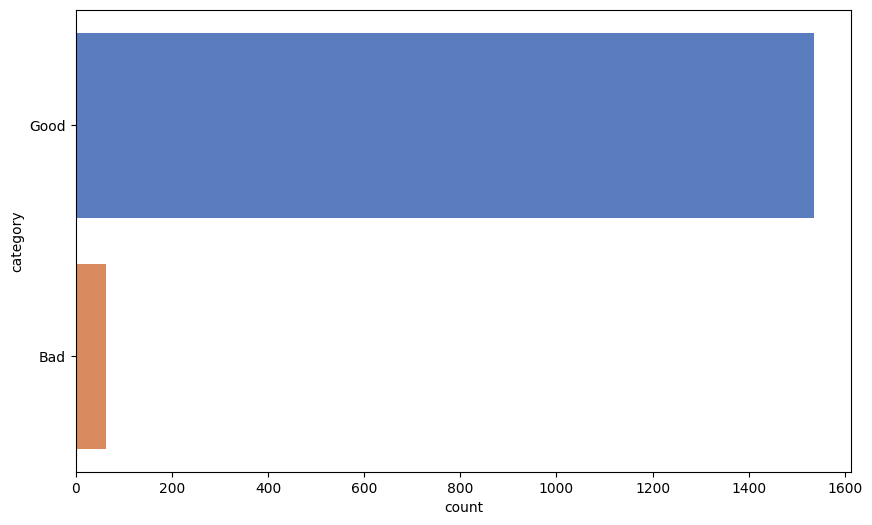

In [10]:
quality = df_wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Bad")
    else:
        category.append("Good")

# Create new data
category = pd.DataFrame(data=category, columns=["category"])
df_wine = pd.concat([df_wine, category], axis=1)
df_wine.drop(columns="quality", axis=1, inplace=True)

plt.figure(figsize=(10,6))
sns.countplot(df_wine["category"], palette="muted")
df_wine["category"].value_counts()


C:\Users\bh_ro\AppData\Local\Temp\ipykernel_37276\499801753.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote_res, palette="muted")


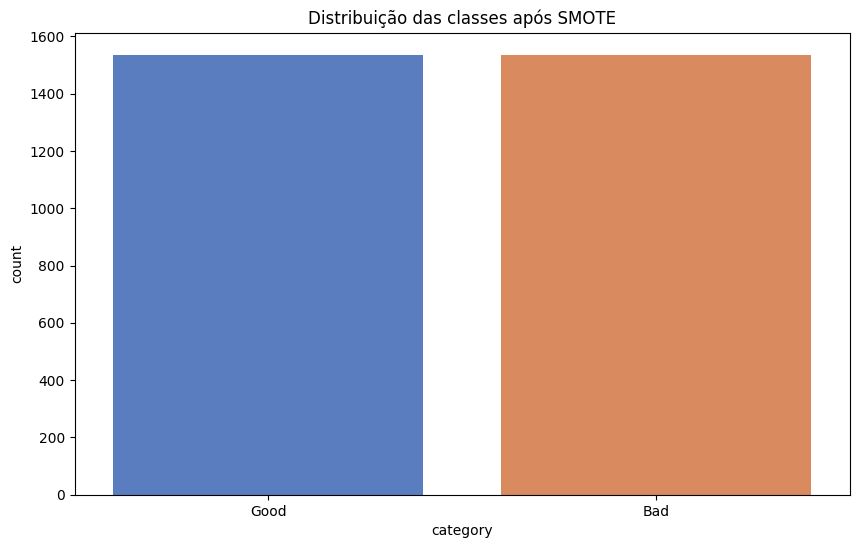

In [15]:
X = df_wine.drop('category', axis=1)
y = df_wine['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)
smote = SMOTE(random_state=32)
X_smote_res, y_smote_res = smote.fit_resample(X, y)
plt.figure(figsize=(10, 6))
sns.countplot(x=y_smote_res, palette="muted")
plt.title("Distribuição das classes após SMOTE")
plt.show()